# Exercise: RDataFrame basics

The file `example_file.root` in the `data` directory contains a `TTree` dataset (called `"dataset"`) with two scalar columns `a` and `b`.<br>
There is a normal distribution hidden in there, but to display it you have to plot the natural logarithm of `a` only for entries in which `b <= 0.5`.

### Useful links

- [RDataFrame class reference](https://root.cern/doc/master/classROOT_1_1RDataFrame.html)
- [RDataFrame tutorials](https://root.cern.ch/doc/master/group__tutorial__dataframe.html)

In [1]:
import ROOT

Welcome to JupyROOT 6.30/04


In [2]:
treename = "dataset"
filename = "../../data/example_file.root"
df = ROOT.RDataFrame(treename, filename)

print(f"Columns in the dataset: {df.GetColumnNames()}")

Columns in the dataset: { "a", "b", "vec1", "vec2" }


In [3]:
npy_dict = df.AsNumpy(["b"])

for row, vec in enumerate(npy_dict["b"]):
    print(f"\nRow {row} contains:\n{vec}")


Row 0 contains:
0.999741748906672

Row 1 contains:
0.48497361433692276

Row 2 contains:
0.39231399400159717

Row 3 contains:
0.3335392498411238

Row 4 contains:
0.6481255746912211

Row 5 contains:
0.20777990645729005

Row 6 contains:
0.5473714109975845

Row 7 contains:
0.431845462648198

Row 8 contains:
0.6278364716563374

Row 9 contains:
0.37043020129203796

Row 10 contains:
0.7440853074658662

Row 11 contains:
0.04230316332541406

Row 12 contains:
0.6445746540557593

Row 13 contains:
0.12553928582929075

Row 14 contains:
0.6644296131562442

Row 15 contains:
0.13087996537797153

Row 16 contains:
0.2587214196100831

Row 17 contains:
0.9967236891388893

Row 18 contains:
0.8471265882253647

Row 19 contains:
0.12083048350177705

Row 20 contains:
0.3428412340581417

Row 21 contains:
0.868841016665101

Row 22 contains:
0.011820841114968061

Row 23 contains:
0.29933327389881015

Row 24 contains:
0.8054298446513712

Row 25 contains:
0.6809530595783144

Row 26 contains:
0.27783745946362615

R

In [4]:
df1 = df.Filter("b <= 0.5")

df2 = df1.Define("loga", "TMath::Log(a)")

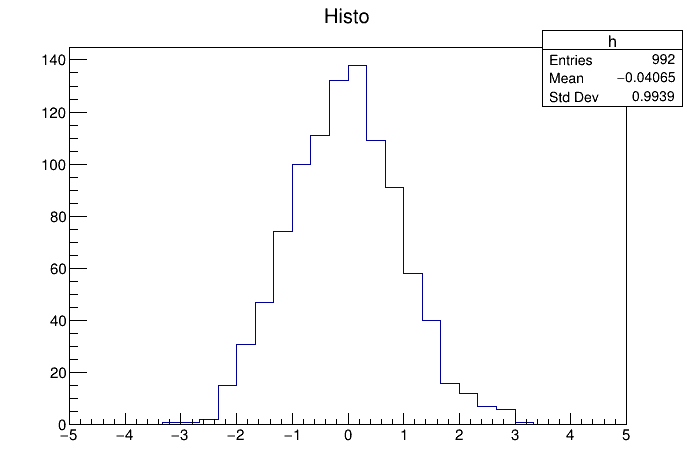

In [5]:
c = ROOT.TCanvas()
h = df2.Histo1D(("h","Histo", 30, -5, 5), "loga")
h.Draw()
c.Draw()
